<a href="https://colab.research.google.com/github/Sherif-toiema22/NTI-machine-learning-tasks-/blob/main/Copy_of_Assignment_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Do not forget to make a Copy from this Notebook (file -> save a copy in Drive)**

# Task 1

In [1]:
# Demo
rows = int(input("Enter the number of rows: "))

for i in range(1, rows + 1):
    print('#' * i)

Enter the number of rows: 5
#
##
###
####
#####


Draw the pyramid like this:

```
 Height: 9
        #
       ##
      ###
     ####
    #####
   ######
  #######
 ########
#########
```
```
# Height: 4
        #
       ##
      ###
     ####
```

In [2]:
# Type your code here

def draw_pyramid(height):
    for i in range(1, height + 1):
        print(' ' * (height - i) + '#' * i)

height = 9
draw_pyramid(height)


        #
       ##
      ###
     ####
    #####
   ######
  #######
 ########
#########


# Task 2

```
# Height: 4
   #  #
  ##  ##
 ###  ###
####  ####
```

```
# Height: 8
       #  #
      ##  ##
     ###  ###
    ####  ####
   #####  #####
  ######  ######
 #######  #######
########  ########
```

In [3]:
# Type your code here
def draw_pyramid(height):
    for i in range(1, height + 1):
        spaces = ' ' * (height - i)
        hashes = '#' * i
        print(f"{spaces}{hashes}  {hashes}")

height = 9
draw_pyramid(height)


        #  #
       ##  ##
      ###  ###
     ####  ####
    #####  #####
   ######  ######
  #######  #######
 ########  ########
#########  #########


# Task 3: Credit

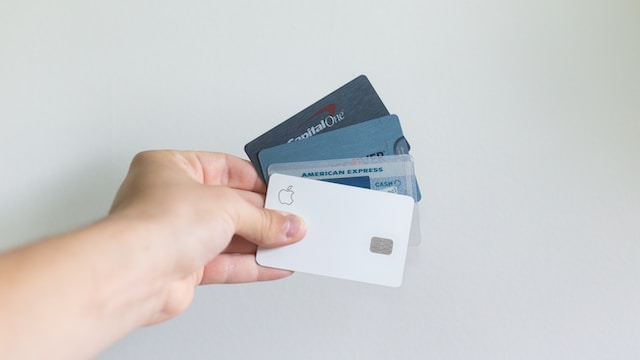

A credit (or debit) card, of course, is a plastic card with which you can pay for goods and services. Printed on that card is a number that’s also stored in a database somewhere, so that when your card is used to buy something, the creditor knows whom to bill. There are a lot of people with credit cards in this world, so those numbers are pretty long: American Express uses 15-digit numbers, MasterCard uses 16-digit numbers, and Visa uses 13- and 16-digit numbers. And those are decimal numbers (0 through 9), not binary, which means, for instance, that American Express could print as many as 10^15 = 1,000,000,000,000,000 unique cards! (That’s, um, a quadrillion.)

Actually, that’s a bit of an exaggeration, because credit card numbers actually have some structure to them. All American Express numbers start with 34 or 37; most MasterCard numbers start with 51, 52, 53, 54, or 55 (they also have some other potential starting numbers which we won’t concern ourselves with for this problem); and all Visa numbers start with 4. But credit card numbers also have a “checksum” built into them, a mathematical relationship between at least one number and others. That checksum enables computers (or humans who like math) to detect typos (e.g., transpositions), if not fraudulent numbers, without having to query a database, which can be slow. Of course, a dishonest mathematician could certainly craft a fake number that nonetheless respects the mathematical constraint, so a database lookup is still necessary for more rigorous checks.

So what’s the secret formula? Well, most cards use an algorithm invented by Hans Peter Luhn of IBM. According to Luhn’s algorithm, you can determine if a credit card number is (syntactically) valid as follows:

1. Multiply every other digit by 2, starting with the number’s second-to-last digit, and then add those products’ digits together.
2. Add the sum to the sum of the digits that weren’t multiplied by 2.
3. If the total’s last digit is 0 (or, put more formally, if the total modulo 10 is congruent to 0), the number is valid!

That’s kind of confusing, so let’s try an example with David’s Visa: 4003600000000014.

**1. For the sake of discussion, let’s first underline every other digit, starting with the number’s second-to-last
digit:**

4003600000000014

Okay, let’s multiply each of the underlined digits by 2:

1•2 + 0•2 + 0•2 + 0•2 + 0•2 + 6•2 + 0•2 + 4•2

That gives us:

2 + 0 + 0 + 0 + 0 + 12 + 0 + 8

Now let’s add those products’ digits (i.e., not the products themselves) together:

2 + 0 + 0 + 0 + 0 + 1 + 2 + 0 + 8 = 13

**2. Now let’s add that sum (13) to the sum of the digits that weren’t multiplied by 2 (starting from the end):**

13 + 4 + 0 + 0 + 0 + 0 + 0 + 3 + 0 = 20

**3. Yup, the last digit in that sum (20) is a 0, so David’s card is legit!**

So, validating credit card numbers isn’t hard, but it does get a bit tedious by hand. Let’s write a program.

**Test Caces**

```
Number: 4003600000000014
VISA
```

```
Number: 4003-6000-0000-0014
Number: foo
Number: 4003600000000014
VISA
```

```
Number: 6176292929
INVALID
```

Test out your program with a whole bunch of inputs, both valid and invalid.Here are a few card numbers that PayPal recommends for testing.
[more test caces](https://developer.paypal.com/api/nvp-soap/payflow/integration-guide/test-transactions/#standard-test-cards)

In [5]:
# Type your code here
def luhn_algorithm(card_number):
    # Remove non-numeric characters
    card_number = ''.join(filter(str.isdigit, card_number))

    # Check if card_number is empty after filtering
    if not card_number:
        return "Invalid number format"

    # Luhn algorithm implementation
    def digits_of(n):
        return [int(d) for d in str(n)]

    digits = digits_of(card_number)
    odd_digits = digits[-1::-2]
    even_digits = digits[-2::-2]

    checksum = sum(odd_digits)
    for d in even_digits:
        checksum += sum(digits_of(d * 2))

    return checksum % 10 == 0

def get_card_type(card_number):
    if card_number.startswith('4'):
        return "VISA"
    elif card_number[:2] in ['34', '37']:
        return "American Express"
    elif card_number[:2] in ['51', '52', '53', '54', '55']:
        return "MasterCard"
    else:
        return "Unknown Card Type"

def validate_card(card_number):
    if luhn_algorithm(card_number):
        return get_card_type(card_number)
    else:
        return "Invalid card number"

# Test Cases
test_cases = [
    "4003600000000014",
    "4003-6000-0000-0014",
    "foo",
    "4003600000000014"
]

for number in test_cases:
    print(f"Number: {number}")
    print(f"Result: {validate_card(number)}\n")



Number: 4003600000000014
Result: VISA

Number: 4003-6000-0000-0014
Result: VISA

Number: foo
Result: Unknown Card Type

Number: 4003600000000014
Result: VISA



# Task 4

Consider an List of Integer values with size N, having values as in this Example

Example:
`[7, 0, 0, 0, 5, 6, 7, 5, 0, 7, 5,  3]`

Your task will be to write a program find the longest distance between Two equal cells. In this example. The distance is measured by the number Of cells- for example, the distance between the first and the fourth cell is 2 (cell 2 and cell 3).

In the example above, the longest distance is between the first 7 and the $10_{th}$ 7, with a distance of § cells, i.e. the number of cells between the Ist And the $10_{th}$ 7s.

Note:

- **Array values will be taken from the user**

- **If you have input like 1111111 then the distance is the number of Cells between the first and the last cell.**

In [6]:
def longest_distance(nums):
    index_dict = {}
    longest = 0

    for i, num in enumerate(nums):
        if num not in index_dict:
            index_dict[num] = [i]
        else:
            index_dict[num].append(i)

    for indices in index_dict.values():
        if len(indices) > 1:
            distance = indices[-1] - indices[0]
            longest = max(longest, distance)

    return longest

# Example usage
nums = [7, 0, 0, 0, 5, 6, 7, 5, 0, 7, 5, 3]
print(longest_distance(nums))  # Output: 9

9


# Task 5

Give a list of space separated words, reverse the order of the words.

**Test cases**
```
Input: this is a test
Output: test a is this
```
```
Input:all your base
Output: base your all
```
```
Input: Word
Output: Word
```

**Note:-**
- Don't use `for` or `while` loop, just max. of line is 3.

In [4]:
def reverse_words(text):
  words = text.split()
  reversed_words = words[::-1]
  return ' '.join(reversed_words)

# Test cases
input1 = "this is a test"
input2 = "all your base"

output1 = reverse_words(input1)
output2 = reverse_words(input2)

print(output1)  # Output: test a is this
print(output2)  # Output: base your all

test a is this
base your all


# Task 6

How can you count the occurrence of 1 from 1 to 99,999,999 (1 short of 100 million 10^8) and total up how many 1s were there. **with THREE WAY**

1. Convert Numbers to String in Case one and use String Functions to Count 1s.
2. Use Only Mathematical Functions and Numeric values in case 2 and see the difference in performance.\
example:-
```
num = 1234
u: 4
T: 3:
h: 2
Th: 1 Count
```
3. Is There Any Other Way to Do it in Approximately 1 Second or less.

In [8]:
def count_ones_string(n):
    count = 0
    for i in range(1, n + 1):
        count += str(i).count('1')
    return count

count = count_ones_string(99999999)
print(count)

80000000


In [9]:
def count_ones_optimized(n):
    count = 0
    factor = 1
    while factor <= n:
        rounder = factor * 10
        lower = n // rounder * factor
        curr = (n % rounder) // factor
        if curr > 1:
            count += lower + factor
        elif curr == 1:
            count += lower + (n % factor) + 1
        else:
            count += lower
        factor *= 10
    return count

count = count_ones_optimized(99999999)
print(count)

80000000


In [12]:
import time

start_time = time.time()
count_ones_string(99999999)
print("String method took:", time.time() - start_time, "seconds")

start_time = time.time()
count_ones_math(99999999)
print("Math method took:", time.time() - start_time, "seconds")

start_time = time.time()
count_ones_optimized(99999999)
print("Optimized math method took:", time.time() - start_time, "seconds")

String method took: 35.15329384803772 seconds
Math method took: 98.85425329208374 seconds
Optimized math method took: 9.34600830078125e-05 seconds


In [11]:
def count_ones_math(n):
    count = 0
    for i in range(1, n + 1):
        while i > 0:
            if i % 10 == 1:
                count += 1
            i //= 10
    return count

count = count_ones_math(99999999)
print(count)

80000000


In [ ]:
# To calculate the execution time of a code

import time

# Record the start time
start_time = time.time()

# Code block to measure
# ============= Your code ==================
sum = 0
for i in range(1000000):
    sum += i
# ==========================================
# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the execution time
print(f"Execution time: {execution_time} seconds")

Execution time: 0.23149466514587402 seconds
